In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.metrics import SparseCategoricalAccuracy

2022-11-27 19:04:23.022926: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [52]:
data = pd.read_csv('datasets/INFY.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.1, shuffle=False)
train.shape, test.shape
train = data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1724 non-null   object 
 1   Open       1724 non-null   float64
 2   High       1724 non-null   float64
 3   Low        1724 non-null   float64
 4   Close      1724 non-null   float64
 5   Adj Close  1724 non-null   float64
 6   Volume     1724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


In [4]:
trainData = train.iloc[:,4:5].values
# print(trainData)
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
# print(trainData)
length, _ = trainData.shape
length

1724

In [5]:
X_train = []
y_train = []

for i in range (60,length): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train.shape

(1664, 60)

In [6]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1664, 60, 1)

In [7]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error", metrics=[SparseCategoricalAccuracy()])
# model.compile(
#     optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
#     loss=keras.losses.SparseCategoricalCrossentropy(),
#     metrics=[keras.metrics.SparseCategoricalAccuracy()],
# )

In [8]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=1)

Epoch 1/20
52/52 [==============================] - 9s 97ms/step - loss: 0.0141 - sparse_categorical_accuracy: 6.0096e-04
Epoch 2/20
52/52 [==============================] - 5s 100ms/step - loss: 0.0028 - sparse_categorical_accuracy: 6.0096e-04
Epoch 3/20
52/52 [==============================] - 5s 97ms/step - loss: 0.0027 - sparse_categorical_accuracy: 6.0096e-04
Epoch 4/20
52/52 [==============================] - 5s 98ms/step - loss: 0.0026 - sparse_categorical_accuracy: 6.0096e-04
Epoch 5/20
52/52 [==============================] - 5s 99ms/step - loss: 0.0021 - sparse_categorical_accuracy: 6.0096e-04
Epoch 6/20
52/52 [==============================] - 6s 111ms/step - loss: 0.0021 - sparse_categorical_accuracy: 6.0096e-04
Epoch 7/20
52/52 [==============================] - 6s 114ms/step - loss: 0.0030 - sparse_categorical_accuracy: 6.0096e-04
Epoch 8/20
52/52 [==============================] - 6s 110ms/step - loss: 0.0029 - sparse_categorical_accuracy: 6.0096e-04
Epoch 9/20
52/52 [==

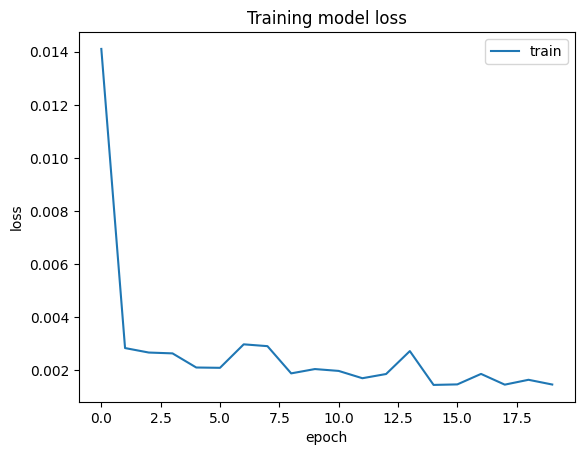

In [9]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [42]:
testData = test
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
print(testData)
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

          Close
1551  22.590000
1552  22.520000
1553  22.459999
1554  22.580000
1555  23.330000
...         ...
1719  18.730000
1720  18.910000
1721  18.410000
1722  18.190001
1723  18.330000

[173 rows x 1 columns]


(113, 60, 1)

In [19]:
y_pred = model.predict(X_test)
y_pred.shape
sc.inverse_transform(y_pred)

4/4 [==============================] - 1s 31ms/step


array([[20.032768],
       [19.898981],
       [19.781816],
       [19.691067],
       [19.633245],
       [19.616316],
       [19.639545],
       [19.696259],
       [19.775145],
       [19.860626],
       [19.93524 ],
       [19.978857],
       [19.973293],
       [19.918169],
       [19.824224],
       [19.697323],
       [19.546854],
       [19.399677],
       [19.272879],
       [19.177048],
       [19.119144],
       [19.10104 ],
       [19.114082],
       [19.148804],
       [19.194357],
       [19.24672 ],
       [19.300575],
       [19.35515 ],
       [19.413507],
       [19.475637],
       [19.530188],
       [19.563168],
       [19.564978],
       [19.53049 ],
       [19.465895],
       [19.386246],
       [19.310545],
       [19.253199],
       [19.228916],
       [19.2391  ],
       [19.272598],
       [19.306072],
       [19.333122],
       [19.36059 ],
       [19.401085],
       [19.464165],
       [19.549799],
       [19.660969],
       [19.796234],
       [19.951115],


In [20]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[20.032768],
       [19.898981],
       [19.781816],
       [19.691067],
       [19.633245],
       [19.616316],
       [19.639545],
       [19.696259],
       [19.775145],
       [19.860626],
       [19.93524 ],
       [19.978857],
       [19.973293],
       [19.918169],
       [19.824224],
       [19.697323],
       [19.546854],
       [19.399677],
       [19.272879],
       [19.177048],
       [19.119144],
       [19.10104 ],
       [19.114082],
       [19.148804],
       [19.194357],
       [19.24672 ],
       [19.300575],
       [19.35515 ],
       [19.413507],
       [19.475637],
       [19.530188],
       [19.563168],
       [19.564978],
       [19.53049 ],
       [19.465895],
       [19.386246],
       [19.310545],
       [19.253199],
       [19.228916],
       [19.2391  ],
       [19.272598],
       [19.306072],
       [19.333122],
       [19.36059 ],
       [19.401085],
       [19.464165],
       [19.549799],
       [19.660969],
       [19.796234],
       [19.951115],


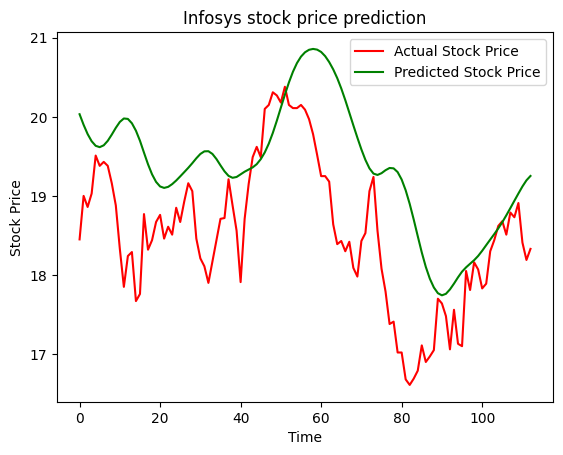

In [21]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Infosys stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
model.save('infosys_model.hdf5')

In [8]:
import tensorflow as tf
model = tf.keras.models.load_model('infosys_model.hdf5')

In [9]:
last60 = data['Close'][-60:].values
last60 = last60.reshape((60, 1))
last60 = sc.transform(last60)
last60 = last60.reshape((1, 60, 1))
print(last60.shape)

(1, 60, 1)


In [10]:
predicted = model.predict(last60)
predicted = sc.inverse_transform(predicted)[0, 0]
predicted

1/1 [==============================] - 1s 1s/step


18.68893

# Monthly report feature

In [48]:
tail = data.tail()
tail

,Date,Open,High,Low,Close,Adj Close,Volume
1719,2022-10-31,18.660000,18.830000,18.610001,18.730000,18.730000,8585500
1720,2022-11-01,19.190001,19.219999,18.840000,18.910000,18.910000,5474700
1721,2022-11-02,18.709999,18.879999,18.410000,18.410000,18.410000,6370600
1722,2022-11-03,18.200001,18.270000,18.080000,18.190001,18.190001,11328700
1723,2022-11-04,18.270000,18.459999,18.100000,18.330000,18.330000,10899800


In [53]:
data['Date'] = pd.to_datetime(data["Date"])

In [27]:
import datetime

In [ ]:
# date_before = datetime.date(2016, 1, 19),
# a = df[df['newest_date_available'] < date_before]
# date_time_str = '2018-06-29 08:15:27.243860'
# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

In [75]:

from pandas.tseries.offsets import MonthEnd

dateFormat = '%Y-%m-%d'
fromDate = datetime.datetime.strptime('2022-10-01', dateFormat)
toDate = datetime.datetime.strptime('2022-10-30', dateFormat)
print(toDate-fromDate)
filtered = data[(data['Date'] >= fromDate) & (data['Date'] <= toDate)]
filtered["MonthEnd"] = pd.to_datetime(filtered['Date'], format=dateFormat) + MonthEnd(0)
# filtered

29 days, 0:00:00


/tmp/ipykernel_4296/625558999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["MonthEnd"] = pd.to_datetime(filtered['Date'], format=dateFormat) + MonthEnd(0)


In [126]:
# for index in filtered.index:
#     pastValues = data['close'][]
start = filtered.index[0] - 61
end = start+60

pastvalues = data['Close'][start:end].values.tolist()
predicted_list = []

days_to_pred = (toDate - fromDate).days
for i in range(len(filteredList)):
    # consider only last 60 values
    pastvalues = pastvalues[-60 : ]

    # convert to numpy array
    pastarr = np.array(pastvalues)

    reshaped = pastarr.reshape((60, 1))
    transformed = sc.transform(reshaped)
    reshaped2 = transformed.reshape((1, 60, 1))

    # print(reshaped2.shape)

    predicted = model.predict(reshaped2, verbose=0)
    predicted = sc.inverse_transform(predicted)[0, 0]
    print(f"Prediction at {i+1}th day: {predicted}")
    predicted_list.append(predicted)

    pastvalues.append(filteredList[i])
    
# predicted_list

Prediction at 1th day: 16.807411193847656
Prediction at 2th day: 16.75152587890625
Prediction at 3th day: 16.76523780822754
Prediction at 4th day: 16.845470428466797
Prediction at 5th day: 16.97271728515625
Prediction at 6th day: 17.111000061035156
Prediction at 7th day: 17.244230270385742
Prediction at 8th day: 17.352252960205078
Prediction at 9th day: 17.42245101928711
Prediction at 10th day: 17.47774887084961
Prediction at 11th day: 17.53265953063965
Prediction at 12th day: 17.602428436279297
Prediction at 13th day: 17.68949317932129
Prediction at 14th day: 17.78119659423828
Prediction at 15th day: 17.865293502807617
Prediction at 16th day: 17.944229125976562
Prediction at 17th day: 18.024599075317383
Prediction at 18th day: 18.113649368286133
Prediction at 19th day: 18.213659286499023
Prediction at 20th day: 18.315847396850586


In [148]:
table = {
    'Date': filtered['Date'].values.astype(str),
    'Actual': filtered['Close'].values,
    'Predicted': predicted_list
}
tmp = pd.DataFrame(table)
tmp

,Date,Actual,Predicted
0,2022-10-03T00:00:00.000000000,17.049999,16.807411
1,2022-10-04T00:00:00.000000000,17.700001,16.751526
2,2022-10-05T00:00:00.000000000,17.639999,16.765238
3,2022-10-06T00:00:00.000000000,17.480000,16.845470
4,2022-10-07T00:00:00.000000000,17.059999,16.972717
5,2022-10-10T00:00:00.000000000,17.559999,17.111000
6,2022-10-11T00:00:00.000000000,17.129999,17.244230
7,2022-10-12T00:00:00.000000000,17.100000,17.352253
8,2022-10-13T00:00:00.000000000,18.049999,17.422451
9,2022-10-14T00:00:00.000000000,17.809999,17.477749


In [169]:
fromDate.strftime('%d-%m-%Y')

'01-10-2022'